In [20]:
# Importing Liraries 

import numpy as np
import pandas as pd
from sklearn.neighbors import KDTree, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
import time

### **Locality Sensetive Hashing (LSH) Method**


In [21]:
# Function to randomply generate this data
def generate_data(N, D):
    X = np.random.rand(N, D)    # Random data of size NxD in [0,1)
    y = np.random.randint(0, 2, size=N)   # Number of Classes Here
    return X, y

In [22]:
# Hyper Plane Generator

def random_hyper_plane(d: int):
    w = 2*np.random.rand(d) - 1
    b = 2*np.random.rand() - 1
    return w, b

In [23]:
# Vectorie Data

def vectorize(test_data, p, N, D):
    X = np.hstack((test_data, np.ones((N, 1)))) # Augmented Matrix 
    W = np.zeros((D+1, p))
    for i in range(p):
        w, b = random_hyper_plane(D)
        W[:, i] = np.concatenate((w, [b]), axis=0)
    return X, W


In [24]:
# Hash Function

def Hash(X, W):
    return np.sign(X@W)  # Size N x p

In [25]:
# Prediction for a Query

def predict_LSH(X, H, W, query_pt, y):
    h = Hash(np.hstack([query_pt, np.ones(1)]), W) # Size 1 x p
    bucket_idx = np.where(np.all(H == h, axis=1))[0]
    # If bucket is empty, return a default value
    if len(bucket_idx) == 0:
        return max(y)
    bucket_pts = X[bucket_idx]
    distances = np.linalg.norm(bucket_pts - query_pt, axis=1)
    knn_idx = np.argmin(distances)
    return y[bucket_idx[knn_idx]]


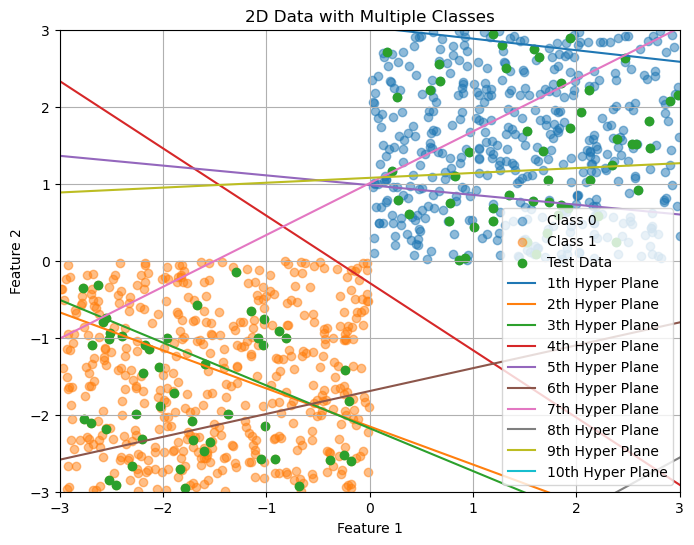

Accuracy =  1.0
Confuction Matrix: 
 [[52  0]
 [ 0 48]]


In [26]:
# Setting Hyper Parameters Manually

N = 1000   # Dataset Size
D = 2      # Dataset Dimension
p = 10   # Number of Hyper Planes
split_ratio = 0.1 # Test Ratio


# Generate Data
X, y = generate_data(N,D)
# Add Bias to a class for better cassification
for i, pt in enumerate(X):
    if y[i] == 0:
        X[i] = 3*X[i] 
    else:
        X[i] = 3*X[i] - 1.5 - 1.5

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)
N_train = int(N*(1-split_ratio)) # New Data Size for Training

# Matrix Formation
X_aug, W = vectorize(X_train, p, N_train, D)
H = Hash(X_aug, W)

y_test_pred = []
for i, point in enumerate(X_test):
    pred = predict_LSH(X_train, H, W, point, y_train)
    y_test_pred.append(pred)


# plot X based on y 
plt.figure(figsize=(8, 6))
for class_label in np.unique(y):
    class_data = X[y == class_label]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}', alpha = 0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data')
X_line = np.linspace(-3, 3, 100)
for i in range(p):
    y_line =  W[0,i] * X_line - W[2,i] / W[1,i]
    plt.plot(X_line, y_line, label=f'{i+1}th Hyper Plane'.format(i))
plt.title('2D Data with Multiple Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend()
plt.grid(True)
plt.show()


print("Accuracy = ",accuracy_score(y_test, y_test_pred))
print("Confuction Matrix: \n", confusion_matrix(y_test, y_test_pred))

### **Parameterized Visualization**

In [27]:
# Hyper Parameters with Sliding Values

def plot_function(Data_Points, No_Dimensions, No_Hyperplanes, Train_Test_Split_Ratio):
    # Generate Data
    X, y = generate_data(Data_Points, No_Dimensions)
    # Add Bias to a class for better classification
    for i, pt in enumerate(X):
        if y[i] == 0:
            X[i] = 3*X[i] 
        else:
            X[i] = 3*X[i] - 3

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Train_Test_Split_Ratio, random_state=42)
    N_train = int(Data_Points * (1 - Train_Test_Split_Ratio)) # New Data Size for Training

    # Matrix Formation and prediction
    X_aug, W = vectorize(X_train, No_Hyperplanes, N_train, No_Dimensions)
    H = Hash(X_aug, W)
    y_test_pred = []

    start = time.time()
    for i, point in enumerate(X_test):
        pred = predict_LSH(X_train, H, W, point, y_train)
        y_test_pred.append(pred)

    plt.figure(figsize=(10, 10))
    for class_label in np.unique(y):
        class_data = X[y == class_label]
        plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}', alpha=0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data')
    X_line = np.linspace(-3, 3, 100)
    for i in range(No_Hyperplanes):
        y_line =  W[0, i] * X_line - W[2, i] / W[1, i]
        plt.plot(X_line, y_line, label=f'{i+1}th Hyper Plane'.format(i))
    plt.title('2D Data with Multiple Classes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.legend()
    plt.grid(True)
    plt.show()

    end = time.time()
    print("Time = ",(end-start)*1000 , "miliseconds")
    print("Accuracy = ",accuracy_score(y_test, y_test_pred))
    print("Confuction Matrix: \n", confusion_matrix(y_test, y_test_pred))

# Define sliders
N_Slider = IntSlider(min=1, max=1000, step=20, value=100, description='Data Points')
D_Slider = IntSlider(min=2, max=5, step=1, value=2, description='Dimensions')
P_Slider = IntSlider(min=1, max=20, step=1, value=3, description='Hyperplanes')
split_Slider = FloatSlider(min=0, max=1, step=0.01, value=0.2, description='Test Ratio')


# Link sliders to plotting function
interact(plot_function, Data_Points=N_Slider, No_Dimensions=D_Slider, No_Hyperplanes=P_Slider, Train_Test_Split_Ratio=split_Slider)



interactive(children=(IntSlider(value=100, description='Data Points', max=1000, min=1, step=20), IntSlider(val…

<function __main__.plot_function(Data_Points, No_Dimensions, No_Hyperplanes, Train_Test_Split_Ratio)>

### **Multiple Classes and Complicated DataSet**

In [28]:
# Function to randomply generate this data
def generate_data(N, D):
    X = np.random.rand(N, D)    # Random data of size NxD in [0,1)
    y = np.random.randint(0, 4, size=N)   # Number of Classes = 4
    return X, y

In [29]:
# Hyper Parameters with Sliding Values 

def plot_function(Data_Points, No_Dimensions, No_Hyperplanes, Train_Test_Split_Ratio):
    # Generate Data
    X, y = generate_data(Data_Points, No_Dimensions)
    # Add Bias to a class for better classification
    for i, pt in enumerate(X):
        if y[i] == 0:
            X[i] = 3*X[i] 
        elif y[i]==2:
            X[i] = 3*X[i] - 1.5 
        elif y[i]==1:
            X[i] = 3*X[i] + 1.5 
        else:
            X[i] = -4*X[i] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Train_Test_Split_Ratio, random_state=42)
    N_train = int(Data_Points * (1 - Train_Test_Split_Ratio)) # New Data Size for Training

    # Matrix Formation and prediction
    X_aug, W = vectorize(X_train, No_Hyperplanes, N_train, No_Dimensions)
    H = Hash(X_aug, W)
    y_test_pred = []

    start = time.time()
    for i, point in enumerate(X_test):
        pred = predict_LSH(X_train, H, W, point, y_train)
        y_test_pred.append(pred)

    plt.figure(figsize=(10, 10))
    for class_label in np.unique(y):
        class_data = X[y == class_label]
        plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}', alpha=0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data')
    X_line = np.linspace(-3, 3, 100)
    for i in range(No_Hyperplanes):
        y_line =  W[0, i] * X_line - W[2, i] / W[1, i]
        plt.plot(X_line, y_line, label=f'{i+1}th Hyper Plane'.format(i))
    plt.title('2D Data with Multiple Classes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.legend()
    plt.grid(True)
    plt.show()
    end = time.time()
    print("Time = ",(end-start)*1000 , "miliseconds")
    print("Accuracy = ",accuracy_score(y_test, y_test_pred))
    print("Confuction Matrix: \n", confusion_matrix(y_test, y_test_pred))

# Define sliders
N_Slider = IntSlider(min=1, max=10000, step=20, value=1000, description='Data Points')
D_Slider = IntSlider(min=1, max=5, step=1, value=2, description='Dimensions')
P_Slider = IntSlider(min=1, max=20, step=1, value=3, description='Hyperplanes')
split_Slider = FloatSlider(min=0, max=1, step=0.01, value=0.05, description='Test Ratio')


# Link sliders to plotting function
interact(plot_function, Data_Points=N_Slider, No_Dimensions=D_Slider, No_Hyperplanes=P_Slider, Train_Test_Split_Ratio=split_Slider)



interactive(children=(IntSlider(value=1000, description='Data Points', max=10000, min=1, step=20), IntSlider(v…

<function __main__.plot_function(Data_Points, No_Dimensions, No_Hyperplanes, Train_Test_Split_Ratio)>

In [30]:
def generate_xor_data(num_points, Dimensions):
    X = np.random.rand(num_points, Dimensions) * 6 - 3  # Random points in [-3, 3] range
    
    # Assign labels based on XOR pattern
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    
    return X, y

In [32]:
# Hyper Parameters with Sliding Values 

def plot_function(Data_Points, No_Dimensions, No_Hyperplanes, Train_Test_Split_Ratio):
    # Generate Data
    X, y = generate_xor_data(Data_Points, No_Dimensions)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Train_Test_Split_Ratio, random_state=42)
    N_train = int(Data_Points * (1 - Train_Test_Split_Ratio)) # New Data Size for Training

    start_x = time.time()
    # Matrix Formation and prediction
    X_aug, W = vectorize(X_train, No_Hyperplanes, N_train, No_Dimensions)
    H = Hash(X_aug, W)
    y_test_pred = []

    start = time.time()
    for i, point in enumerate(X_test):
        pred = predict_LSH(X_train, H, W, point, y_train)
        y_test_pred.append(pred)
    end = time.time()

    plt.figure(figsize=(10, 10))
    for class_label in np.unique(y):
        class_data = X[y == class_label]
        plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}', alpha=0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data')
    X_line = np.linspace(-3, 3, 100)
    for i in range(No_Hyperplanes):
        y_line =  W[0, i] * X_line - W[2, i] / W[1, i]
        plt.plot(X_line, y_line, label=f'{i+1}th Hyper Plane'.format(i))
    plt.title('2D Data with Multiple Classes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.legend()
    plt.grid(True)
    plt.show()
    print("Train Time = ",(start - start_x)*10000 , "miliseconds")
    print("Test Time = ",(end-start)*100 , "miliseconds")
    print("Accuracy = ",accuracy_score(y_test, y_test_pred))
    print("Confuction Matrix: \n", confusion_matrix(y_test, y_test_pred))

# Define sliders
N_Slider = IntSlider(min=1, max=10000, step=20, value=1000, description='Data Points')
D_Slider = IntSlider(min=1, max=5, step=1, value=2, description='Dimensions')
P_Slider = IntSlider(min=1, max=20, step=1, value=3, description='Hyperplanes')
split_Slider = FloatSlider(min=0, max=1, step=0.01, value=0.05, description='Test Ratio')


# Link sliders to plotting function
interact(plot_function, Data_Points=N_Slider, No_Dimensions=D_Slider, No_Hyperplanes=P_Slider, Train_Test_Split_Ratio=split_Slider)



interactive(children=(IntSlider(value=1000, description='Data Points', max=10000, min=1, step=20), IntSlider(v…

<function __main__.plot_function(Data_Points, No_Dimensions, No_Hyperplanes, Train_Test_Split_Ratio)>

 $$ \text{Training Time: } O(NPD) $$
 $$ \text{Testing Time: } O(DP+\frac{DN}{2^P}) $$